In [5]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../../..")


# Importing GemPy
import gempy as gp
# Embedding matplotlib figures in the notebooks
%matplotlib inline
# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt


In [10]:
# set resolution, extent and input data
geo_data = gp.create_data([0,1000,0,1000,0,1000],resolution=[20,21,22], 
                        path_o = os.pardir+"/data/input_data/jan_models/model1_orientations.csv",
                        path_i = os.pardir+"/data/input_data/jan_models/model1_surface_points.csv") 

Active grids: ['regular']


FileNotFoundError: [Errno 2] File b'../data/input_data/jan_models/model1_surface_points.csv' does not exist: b'../data/input_data/jan_models/model1_surface_points.csv'

In [ ]:
# define series and assign surfaces
gp.map_series_to_surfaces(geo_data, {"Strat_Series": ('rock2','rock1'),"Basement_Series":('basement')})

In [4]:
# define the interpolator
interp_data = gp.set_interpolation_data(geo_data, compile_theano=True,
                                        theano_optimizer='fast_compile')

Compiling theano function...
Compilation Done!


In [5]:
#calcualte the solution
sol = gp.compute_model(geo_data)

../..\gempy\core\solution.py:258: UserWarning: Surfaces not computed due to: marching_cubes_lewiner() got an unexpected keyword argument 'mask'
  warnings.warn('Surfaces not computed due to: ' + str(e))


In [6]:
import gempy as gp
#importlib.reload(kriging)
from gempy.assets import kriging

In [7]:
test_data = np.array([[110,0,510,2],[910,0,510,1],[510,0,530,1],[310,0,410,5]])

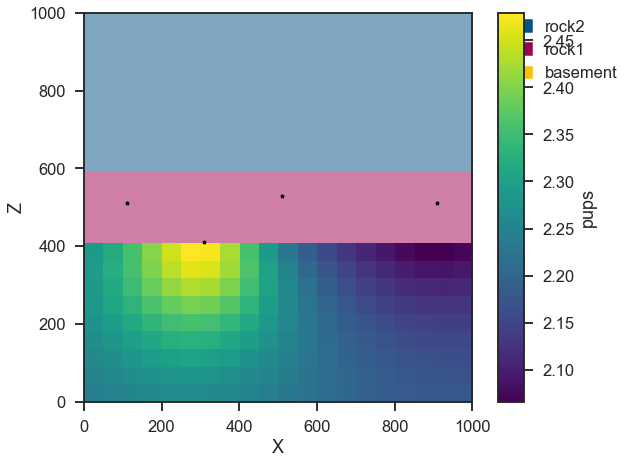

In [15]:
# Creating a kriging object with model solution and input domain (by id) and conditioning data
kriging_model = kriging.kriging_model(model=sol, domain=[3],data=test_data)

kriging_model.krig_grid = np.round(kriging_model.krig_grid,0)

# set some parameters, not final yet
kriging_model.range_ = 200
kriging_model.moving_neighbourhood  = 'all'
kriging_model.set_kriging_type('OK')
kriging_model.nugget = 2
kriging_model.sill = np.var(test_data[:,3])

kriging_model.create_kriged_field()
#kriging_model.results_df.head()
kriging_model.plot_results(geo_data=geo_data, prop='val', contour=False, direction='y', cell_number=2, alpha=.5,
                          legend=True)

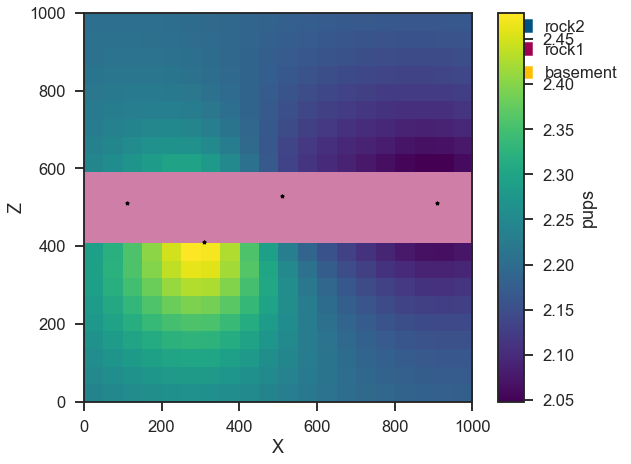

In [9]:
# Creating a kriging object with model solution and input domain (by id) and conditioning data
kriging_model = kriging.kriging_model(model=sol, domain=[1,3],data=test_data)

kriging_model.krig_grid = np.round(kriging_model.krig_grid,0)

# set some parameters, not final yet
kriging_model.range_ = 200
kriging_model.moving_neighbourhood  = 'all'
kriging_model.set_kriging_type('OK')
kriging_model.nugget = 2
kriging_model.sill = np.var(test_data[:,3])

kriging_model.create_kriged_field()
#kriging_model.results_df.head()
kriging_model.plot_results(geo_data=geo_data, prop='val', contour=False, direction='y', cell_number=2, alpha=.5,
                          legend=True)

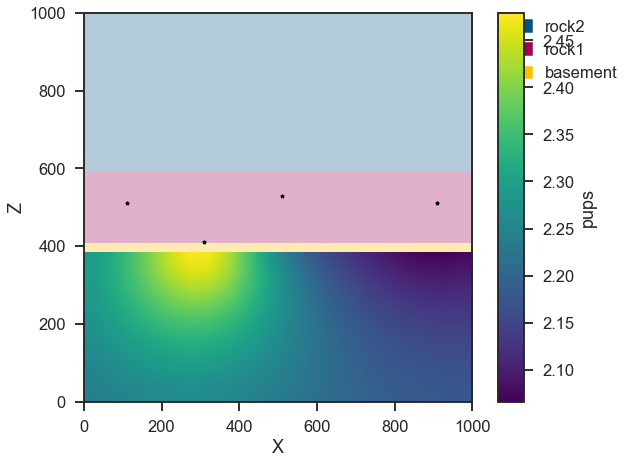

In [17]:
kriging_model.plot_results(geo_data=geo_data, prop='val', contour=False, direction='y', cell_number=2, alpha=.7,
                          legend=True, interpolation='bilinear', show_data=True)

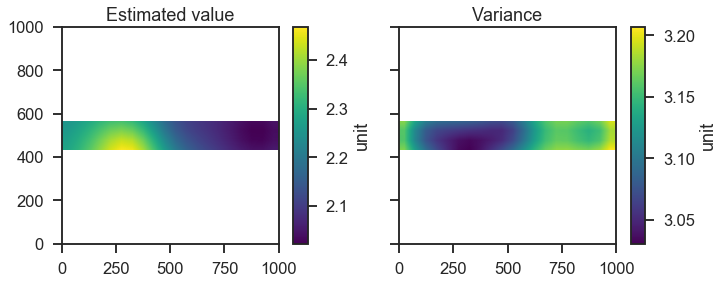

In [11]:
# Creating a kriging object with model solution and input domain (by id) and conditioning data
kriging_model = kriging.kriging_model(model=sol, domain=[2],data=test_data)

kriging_model.krig_grid = np.round(kriging_model.krig_grid,0)

# set some parameters, not final yet
kriging_model.range_ = 200
kriging_model.moving_neighbourhood  = 'all'
kriging_model.set_kriging_type('OK')
kriging_model.nugget = 2
kriging_model.sill = np.var(test_data[:,3])

kriging_model.create_kriged_field()
#kriging_model.results_df.head()
kriging_model.plot_results(geo_data=geo_data, prop='both', contour=False, direction='y', cell_number=2, alpha=0,
                          interpolation='bilinear', show_data=False)

../..\gempy\assets\kriging.py:522: UserWarning: The following kwargs were not used by contour: 'interpolation'
  extent=extent_val, interpolation=interpolation)


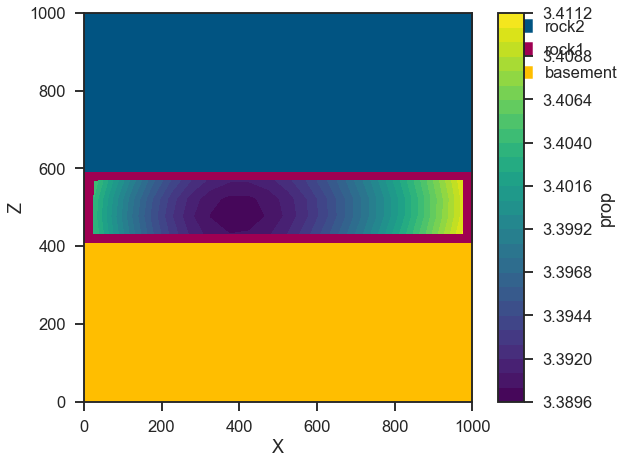

In [24]:
# Creating a kriging object with model solution and input domain (by id) and conditioning data
kriging_model = kriging.kriging_model(model=sol, domain=[2],data=test_data)

kriging_model.krig_grid = np.round(kriging_model.krig_grid,0)

# set some parameters, not final yet
kriging_model.range_ = 200
kriging_model.moving_neighbourhood  = 'all'
kriging_model.set_kriging_type('OK')
kriging_model.nugget = 2
kriging_model.sill = np.var(test_data[:,3])

kriging_model.create_kriged_field()
#kriging_model.results_df.head()
kriging_model.plot_results(geo_data=geo_data, prop='var', contour=True, direction='y', cell_number=12, alpha=1,
                          legend=True, show_data=False)

NameError: name 'x' is not defined

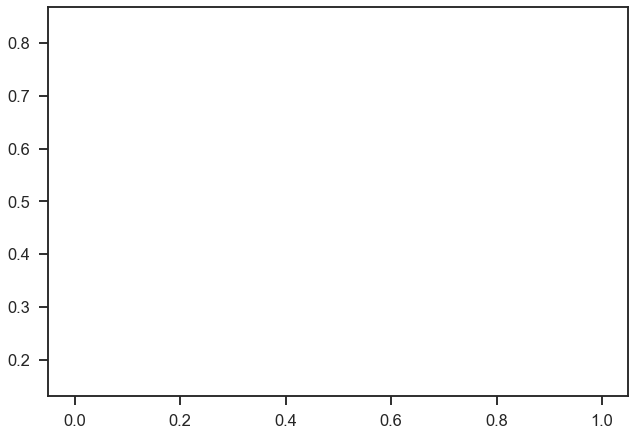

In [20]:
fig1, ax1 = plt.subplots()
ax1.axis('equal')

tcf = ax1.tricontourf(x, y, prop, 20, cmap='viridis')
tcf_lines = ax1.tricontour(x, y, prop, 20, linewidths=0.5, colors='k')
fig1.colorbar(tcf)
plt.show()

In [ ]:
x = kriging_model.results_df['X'].values
y = kriging_model.results_df['Z'].values
prop = kriging_model.results_df['est_value'].values
var = kriging_model.results_df['est_variance'].values

In [ ]:
data_x = kriging_model.data[:,0]
data_y = kriging_model.data[:,1]
data_z = kriging_model.data[:,2]
data_val = kriging_model.data[:,3]

In [ ]:
# Creating a kriging object with model solution and input domain (by id) and conditioning data
#kriging_model = kriging.kriging_model(model=sol, domain=[2],data=test_data)

#kriging_model.krig_grid = np.round(kriging_model.krig_grid,0)

# change moving neighbourhood for simulation
kriging_model.moving_neighbourhood  = 'n_closest'


kriging_model.create_gaussian_field()

kriging_model.results_sim_df.head()

In [ ]:
# results_df and results_sim_df are basically all you need for plotting I guess (hope)
# (plus maybe the solution (sol) that I pass to the object)

# 2D section plotting:
# - as for gempy section
# - either value or variance
# - either results or simulation results (if calculated)
# - either contourf or block
# - plot on section of model (maybe change colors of background model)
# - allow to plot on subplot if thats not automatically possible

# 3D Plotting
# - Most useful and cool for first run would be block model
# - allow threshhold to show only certain blocks

# variogram/covariance function plotting (Jan)
# - easily plot used function 
# - show nugget range and sill 
# - allow to plot on subplot if thats not automatically possible
